Business Analytics - Analytics Cup 21

In [88]:
# importing libaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from collections import Counter


In [9]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


Saving train_physicians.csv to train_physicians.csv


In [11]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


Saving test_physicians.csv to test_physicians.csv


In [13]:
train = pd.read_csv("train_physicians.csv")

In [12]:
test = pd.read_csv("test_physicians.csv")

In [14]:
train.head()

,Physician_ID,State,Primary_Specialty,ownership_interest,total_payments,number_of_payments
0,1,FL,Allopathic & Osteopathic Physicians|Obstetrics...,0,952.93,47
1,2,MD,Allopathic & Osteopathic Physicians|Anesthesio...,0,120924.92,154
2,3,NY,Podiatric Medicine & Surgery Service Providers...,0,3523.93,132
3,4,GA,Allopathic & Osteopathic Physicians|Internal M...,0,26745.61,411
4,5,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,0,25411.21,98


In [15]:
test.head()

,Physician_ID,State,Primary_Specialty,total_payments,number_of_payments
0,14,FL,Allopathic & Osteopathic Physicians|Pain Medic...,5775.53,539
1,18,NY,Allopathic & Osteopathic Physicians|Internal M...,92123.24,584
2,42,NY,Allopathic & Osteopathic Physicians|Obstetrics...,3159.49,180
3,46,MI,NaN,1614.34,64
4,47,MD,Allopathic & Osteopathic Physicians|Internal M...,6494.00,296


In [16]:
test.shape

(1000, 5)

In [17]:
train = train.set_index('Physician_ID')

In [18]:
# labels 
y_train = train["ownership_interest"][0:4000]

y_test = train["ownership_interest"][4001:5000]

print(y_train, y_test)

Physician_ID
1       0
2       0
3       0
4       0
5       0
       ..
5027    0
5028    0
5029    0
5030    1
5031    0
Name: ownership_interest, Length: 4000, dtype: int64 Physician_ID
5033    0
5034    0
5035    0
5036    0
5037    0
       ..
5995    0
5996    0
5997    0
5998    0
6000    0
Name: ownership_interest, Length: 787, dtype: int64


In [19]:
# features (manually)
X_train = train[["total_payments","number_of_payments"]][0:4000]

X_test = train[["total_payments","number_of_payments"]][4001:5000]

Preprocessing

In [20]:
df = pd.read_csv('df.csv')


FileNotFoundError: ignored

In [ ]:
df.head()

,Physician_ID,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
0,1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
1,2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
2,3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
3,4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
4,5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['Physician_ID', 'set', 'City', 'State', 'Primary_Specialty',
       'License_State_1', 'License_State_2', 'License_State_3',
       'License_State_4', 'License_State_5', 'Total_Payments',
       'Ownership_Payments_Count', 'Ownership_Interest'],
      dtype='object')

In [ ]:
# Set ID as the index of your data and then do the split, that way you will retain the ID value for all of your train and test data

df = df.set_index('Physician_ID')

In [ ]:
df.head()

,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Physician_ID,,,,,,,,,,,,
1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['set', 'City', 'State', 'Primary_Specialty', 'License_State_1',
       'License_State_2', 'License_State_3', 'License_State_4',
       'License_State_5', 'Total_Payments', 'Ownership_Payments_Count',
       'Ownership_Interest'],
      dtype='object')

In [ ]:
# dimensionality of the df
df.shape

(6000, 12)

In [ ]:
# pairwise correlations of the columns
df.corr()

,Total_Payments,Ownership_Payments_Count,Ownership_Interest
Total_Payments,1.000000,0.189993,0.111417
Ownership_Payments_Count,0.189993,1.000000,0.473958
Ownership_Interest,0.111417,0.473958,1.000000


In [ ]:
# frequency table
df["set"].value_counts()

train    5000
test     1000
Name: set, dtype: int64

In [ ]:
# frequency table of the target variable -> imbalanced among classes
df["Ownership_Interest"].value_counts()

False    5700
True      300
Name: Ownership_Interest, dtype: int64

In [ ]:
# frequency table
df["Ownership_Payments_Count"].value_counts()

0     5700
1      141
2       33
3       19
4       14
5       10
8        5
12       5
14       5
13       5
9        4
15       4
27       4
7        3
19       3
29       3
22       3
20       3
16       3
10       3
6        2
49       2
18       2
11       2
76       1
63       1
59       1
43       1
39       1
31       1
24       1
32       1
36       1
44       1
88       1
75       1
92       1
23       1
62       1
38       1
21       1
25       1
34       1
33       1
41       1
79       1
Name: Ownership_Payments_Count, dtype: int64

In [ ]:
# labels 
y_train = df["Ownership_Interest"][df["set"] == "train"]

y_test = df["Ownership_Interest"][df["set"] == "test"]


In [ ]:
y_test.unique()

array([False])

In [ ]:
# features (manually)
X_train = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "train"]

X_test = df[["Total_Payments","Ownership_Payments_Count"]][df["set"] == "test"]

In [21]:
# train test split (taking 70% of the labeled training data as the training set and and 30% of the labelled training data as a validation set
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,shuffle=False)


print(X_train, X_test, y_train, y_test)

              total_payments  number_of_payments
Physician_ID                                    
1                     952.93                  47
2                  120924.92                 154
3                    3523.93                 132
4                   26745.61                 411
5                   25411.21                  98
...                      ...                 ...
5027                 1194.67                  39
5028                 7061.66                 218
5029                 1921.75                 106
5030                 9368.84                 764
5031                 2222.38                 121

[4000 rows x 2 columns]               total_payments  number_of_payments
Physician_ID                                    
5033                12061.65                 323
5034                 1263.74                  58
5035                 7459.68                 398
5036                 5399.57                  99
5037                  671.90                

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (787, 2), (4000,), (787,))

In [ ]:
X_train.head()

,total_payments,number_of_payments
0,952.93,47
1,120924.92,154
2,3523.93,132
3,26745.61,411
4,25411.21,98


In [ ]:
y_train.head()

Physician_ID
1    0
2    0
3    0
4    0
5    0
Name: ownership_interest, dtype: int64

In [ ]:
y_test.head()

Physician_ID
5033    0
5034    0
5035    0
5036    0
5037    0
Name: ownership_interest, dtype: int64

XGB Boosting Classifier

Blogpost about using an XGB Classifier for imbalanced classification data
https://towardsdatascience.com/how-to-effectively-predict-imbalanced-classes-in-python-e8cd3b5720c4

XGBoostClassifier’s "scale_pos_weight" parameter is used to train a class-weighted XGBoost classifier for imbalanced data

scale_pos_weight = (sum(negative instances i.e. 0s) / sum(positive instances i.e. 1s)

In [91]:
# count # of examples/data points in each class
counter = Counter(y_train)

counter


Counter({0: 3759, 1: 241})

In [92]:
# estimate scale_pos_weight value, assuming the class labels are 0 and 1
weight = counter[0] / counter[1]

weight

15.597510373443983

In [95]:
# initilizing the XGBClassifier as an object: (using all the default hyperparameters)
# here we initialize an XGBClassifier with a scale_pos_weight for imbalanced classification data
xgbc = xgb.XGBClassifier(scale_pos_weight= weight)



When to use which splitting strategy:

Generally, k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.  
Use stratified cross validation to enforce class distributions when there are a large number of classes or an imbalance in instances for each class.

There are 3 different APIs for evaluating the quality of a model’s predictions:

* Estimator score method: Estimators have a score method providing a default   
evaluation criterion for the problem they are designed to solve.   This is not discussed on this page, but in each estimator’s documentation.  

* Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.  

* Metric functions: The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.


The list of available scoring metrics is the following one:
https://scikit-learn.org/stable/modules/model_evaluation.html

"binary:logistic": logistic regression for binary classification, output probability

"binary:hinge": hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.

Balanced Accuracy = (((TP/(TP+FN)+(TN/(TN+FP))) / 2
 <->
Balanced Accuracy = (Sensitivity + Specificity) / 2

* When the outcome classes are the same size, accuracy and balanced accuracy are the same but the two metrics differ if the classes are imbalanced   

* Balanced accuracy is a good measure when you have imbalanced data and you are indifferent between correctly predicting the negative and positive classes

In [ ]:
# CV type 1: k-fold CV
##kfold = KFold(n_splits=5, shuffle=True) 

Stratified Cross Validation

In [96]:
# CV type 2: stratified k-fold CV (due to imbalance in the data set) -> maintains the ratio of instances in each class for each fold
skfold = StratifiedKFold(n_splits=5, shuffle=False) 

In [97]:
# estimator = xgbc is the xgb classifier model; "cv" determines the cross validation splitting strategy; "scoring" determines the loss function
clf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=skfold,scoring='balanced_accuracy')
print("Stratified K-fold CV average score: %.2f" % clf_cv_scores.mean())

clf_cv_scores # score per fold


Stratified K-fold CV average score: 0.60


array([0.56272163, 0.64029255, 0.56272163, 0.58998227, 0.63326449])

Gridsearch Cross Validation

In [98]:
# gridsearch cross validation (scoring parameter is used to set the loss function for the gscv)

xgbc_gscv = GridSearchCV(estimator = xgbc, scoring = 'balanced_accuracy', param_grid = {'colsample_by_tree':[0.8,1.0],'subsample':[0.8,1.0],"min_child_weight":[1.0], 'learning_rate': [0.1,0.01] , 'max_depth': [5,10], 'n_estimators': [100,200], 'lambda': [0.8,1], 'alpha':[0.8,1.0]}, verbose=1, cv = skfold, n_jobs=4)

In [99]:
# fitting the model multiple times to find the best hyperparameter combination
xgbc_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   58.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:...
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'alpha': [0.8, 1.0], 'colsample_by_tree': [0.8, 1.0],
                         'lambda': [0.8, 1], 'learning_rate': [0.1, 0.01],
                         'max_depth': [5, 10], 'min_child_we

In [100]:
# obtaining the best hyperparameter values from the gridsearch cv
xgbc_gscv.best_params_

{'alpha': 0.8,
 'colsample_by_tree': 0.8,
 'lambda': 0.8,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1.0,
 'n_estimators': 100,
 'subsample': 0.8}

In [101]:
print(xgbc_gscv.scoring, xgbc_gscv.best_score_)

balanced_accuracy 0.5992582801741259


In [102]:
xgbc_gscv.best_estimator_

XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree',
              colsample_by_tree=0.8, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=0, lambda=0.8, learning_rate=0.01,
              max_delta_step=0, max_depth=5, min_child_weight=1.0, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=15.597510373443983, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [103]:
# setting up the optimal xgb classifier model using the configuration of hyperparameters from the gscv
xgbc_opt = xgb.XGBClassifier(objective="binary:logistic", obj="balanced_accuracy", feval = "balanced_accuracy", scale_pos_weight = weight, booster="gbtree",learning_rate=0.01, colsample_bytree=0.8, max_depth=5, min_child_weight=1.0,n_estimators = 100, subsample = 0.8, alpha =0.8, reg_lambda=0.8)

In [104]:
# fitting the XGB classifier model to the training data (final model with optimal hyperparameters from the gscv)
xgbc_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              feval='balanced_accuracy', gamma=0, learning_rate=0.01,
              max_delta_step=0, max_depth=5, min_child_weight=1.0, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, obj='balanced_accuracy',
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.8, scale_pos_weight=15.597510373443983, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [105]:
xgbc_opt.evals_result

<bound method XGBClassifier.evals_result of XGBClassifier(alpha=0.8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              feval='balanced_accuracy', gamma=0, learning_rate=0.01,
              max_delta_step=0, max_depth=5, min_child_weight=1.0, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, obj='balanced_accuracy',
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.8, scale_pos_weight=15.597510373443983, seed=None,
              silent=None, subsample=0.8, verbosity=1)>

In [106]:
# making predictions using the test data
y_pred_xgbc = xgbc_opt.predict(X_test)


In [ ]:
y_pred_xgbc[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# transforming the true/false values into 0/1 values
##y_pred_xgbc = y_pred_xgbc.astype(int)

##y_pred_xgbc[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_xgbc, return_counts=True)


(array([0, 1]), array([546, 241]))

In [108]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([744,  43]))

Model Evaluation

In [109]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgbc)

conf_matrix

array([[527, 217],
       [ 19,  24]])

In [117]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_xgbc)

0.7001270648030495

In [110]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_xgbc)

0.6332364341085271

In [111]:
# feature scores
xgbc_opt.get_booster().get_fscore()

{'number_of_payments': 1101, 'total_payments': 979}

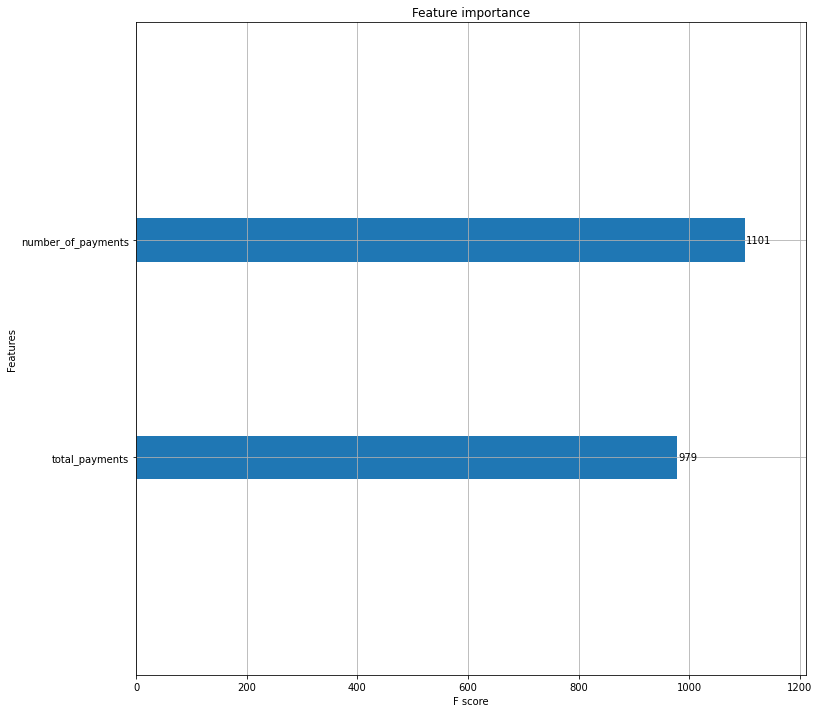

In [112]:
# feature importance plot
xgb.plot_importance(xgbc_opt)
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

Logistic Regression Model

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem  
  
Estimation: Maximum Likelihood

In [ ]:
# creating a logistic regression classifier object 
log_reg = LogisticRegression()

In [ ]:
# gridsearch to optimize the logistic regression model
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_gridsearch = GridSearchCV(log_reg, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_gridsearch.fit(X_train , y_train)
LR_gridsearch.best_params_


Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. Th

[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=200, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=200, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=200, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=200, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=300, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=300, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=300, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=300, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.001, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=400, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=400, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=400, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=400, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=sag ...................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l1, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=500, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=500, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.001, max_iter=500, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.001, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=500, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.001, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=600, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=600, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=600, penalty=l2, solver=saga ..................
[CV]  C=0.001, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l1, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.001, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l1, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.001, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.001, max_iter=700, penalty=l2, solver=newton-cg .............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.001, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.001, max_iter=700, penalty=l2, solver=liblinear .............
[CV]  C=0.001, max_iter=700, penalty=l2, solver=liblinear, score=0.939, total=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................
[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=sag ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.001, max_iter=700, penalty=l2, solver=saga ..................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=0.001, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=200, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=200, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=0.01, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=300, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=300, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.01, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=400, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=400, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=500, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=500, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.01, max_iter=500, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.01, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=600, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=600, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=600, penalty=l2, solver=saga ...................
[CV]  C=0.01, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.01, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.01, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=0.01, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.01, max_iter=700, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=700, penalty=l2, solver=liblinear, score=0.938, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.01, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=0.01, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=200, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=200, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=300, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=300, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=400, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.1, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=400, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=400, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=500, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=500, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=0.1, max_iter=500, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.1, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=600, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=600, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=600, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=0.1, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=0.1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l1, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=0.1, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.5s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=0.1, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=0.1, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=0.1, max_iter=700, penalty=l2, solver=liblinear ...............
[CV]  C=0.1, max_iter=700, penalty=l2, solver=liblinear, score=0.940, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=0.1, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=0.1, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1, max_iter=100, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=200, pe

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=200, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=200, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=200, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=200, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=300,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l1, solver=sa

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=300, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=300, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=300, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=300, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=300, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=1, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=400, penalty=l1, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=40

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=1, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=400, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=400, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=400, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1, max_iter=400, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=5

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=500, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=500, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=5

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=500, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=600, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=6

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=1, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=600, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=600, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=600, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=6

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................
[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=600, penalty=l2, solver=saga ......................
[CV]  C=1, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1, max_iter=700, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=700, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=700, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=700, penalty=l1, solver=newton-cg .................
[CV]  C=1, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, max_iter=700,

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear

[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1, max_iter=700, penalty=l1, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=1, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1, max_iter=700, penalty=l2, solver=newton-cg .................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=lbfgs .....................
[CV]  C=1, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1, max_iter=700, penalty=l2, solver=liblinear .................
[CV]  C=1, max_iter=700, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=1, max_iter=7

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=sag .......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1, max_iter=700, penalty=l2, solver=saga ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=1, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=200, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=200, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=200, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=200, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=200, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=200, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=300, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_i

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=300, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=300, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=300, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=300, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=400, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=10, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=400, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=400, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=400, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=400, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=10, max_iter=400, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=10, max_iter=500, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=500, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=600, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=600, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=10, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=600, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=600, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=600, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=600, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=10, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=10, max_iter=700, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=700, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=10, max_iter=700, penalty=l1, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=10, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=10, max_iter=700, penalty=l2, solver=newton-cg ................


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=10, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=10, max_iter=700, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=10, max_iter=700, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=700, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C=10, ma

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=sag ......................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=10, max_iter=700, penalty=l2, solver=saga .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=10, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=100, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=200, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm

[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=200, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=200, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=200, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=200, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=100, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=300, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=300, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=300, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=300, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=300, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=400, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=400, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=100, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=400, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=400, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=400, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=100, max_iter=400, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=500, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l1, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=500, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=500, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=600, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=100, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=600, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=600, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=600, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=600, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................
[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=600, penalty=l2, solver=saga ....................
[CV]  C=100, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=100, max_iter=700, penalty=l1, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=100, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=newton-cg ...............
[CV]  C=100, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=100, max_iter=700, penalty=l1, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=100, max_iter=700, penalty=l1, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=100, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=100, max_iter=700, penalty=l2, solver=newton-cg ...............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=100, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=100, max_iter=700, penalty=l2, solver=lbfgs ...................
[CV]  C=100, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=100, max_iter=700, penalty=l2, solver=liblinear ...............
[CV]  C=100, max_iter=700, penalty=l2, solver=liblinear, score=0.941, total=   0.0s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=sag .....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=100, max_iter=700, penalty=l2, solver=saga ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=100, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorit

[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l1, solver=saga, score=0.939, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.940, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.938, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=100, penalty=l2, solver=newton-cg, score=0.944, total=   0.3s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=100, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=100, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=100, penalty=l2, solver=sag, score=0.939, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.940, total=   0.0s
[CV] C=1000, max_iter=100, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=100, penalty=l2, solver=saga, score=0.939, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=200, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=200, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=200, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=200, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=200, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=200, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=200, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_s

[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=200, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=200, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=300, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=1000, max_iter=300, penalty=l1, solver=saga, score=0.939, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=300, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=300, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=300, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=300, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=300, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=300, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=300, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=300, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=400, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=1000, max_iter=400, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.941, total=   0.3s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=400, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=400, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=400, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=400, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=400, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=400, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l2, solver=sag, score=0.939, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.940, total=   0.1s
[CV] C=1000, max_iter=400, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=400, penalty=l2, solver=saga, score=0.939, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV]  C=1000, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l1, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=500, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=500, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=500, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=500, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.940, total=   0.1s
[CV] C=1000, max_iter=500, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'no

[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=500, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=500, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=600, penalty=l1, solver=newton-cg, score=nan, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=1000, max_iter=600, penalty=l1, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=600, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=600, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=600, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=600, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=600, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=600, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=600, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

[CV]  C=1000, max_iter=600, penalty=l2, solver=saga, score=0.939, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=newton-cg ..............
[CV]  C=1000, max_iter=700, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l1, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l1, solver=lbfgs, score=nan, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.940, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l1, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm d

[CV]  C=1000, max_iter=700, penalty=l1, solver=saga, score=0.939, total=   0.3s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.941, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.940, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.938, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=newton-cg ..............


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

[CV]  C=1000, max_iter=700, penalty=l2, solver=newton-cg, score=0.944, total=   0.4s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.939, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.934, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.936, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l2, solver=lbfgs ..................
[CV]  C=1000, max_iter=700, penalty=l2, solver=lbfgs, score=0.935, total=   0.0s
[CV] C=1000, max_iter=700, penalty=l2, solver=liblinear ..............
[CV]  C=1000, max_iter=700, penalty=l2, solver=liblinear, score=0.941, total=   0.0s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=sag ....................
[CV]  C=1000, max_iter=700, penalty=l2, solver=sag, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=sag ....................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=sag, score=0.939, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=saga ...................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, max_iter=700, penalty=l2, solver=saga, score=0.940, total=   0.2s
[CV] C=1000, max_iter=700, penalty=l2, solver=saga ...................
[CV]  C=1000, max_iter=700, penalty=l2, solver=saga, score=0.939, total=   0.2s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 2450 out of 2450 | elapsed:  3.4min finished


NameError: ignored

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % LR_gridsearch.best_score_)
print('Config: %s' % LR_gridsearch.best_params_)

Mean Accuracy: 0.940
Config: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# optimal logistic regression model
# C: inverse of regularization strength, 
# solver: algorithm used for optimization problem, 
# penalty: norm used in the penalization term (l1 vs l2)
# max_iter: maximum no. of iterations for the solver to converge
log_reg_opt = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver='liblinear')

In [ ]:
# fitting the logistic regression model to the training data (LR model with gridsearch)
log_reg_opt.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting on the test set
y_pred_lr_opt = log_reg_opt.predict(X_test)

In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_lr_opt, return_counts=True)

(array([0, 1]), array([782,   5]))

In [ ]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_lr_opt)

0.9415501905972046

In [ ]:
# fitting the logistic regression model to the training data (regular LR model without gridsearch)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicting on the test set
y_pred_lr = log_reg.predict(X_test)

In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_lr, return_counts=True)

(array([0, 1]), array([782,   5]))

In [ ]:
y_pred_lr.shape

(787,)

Model evaluation

In [ ]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_lr)

0.9415501905972046

In [ ]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_lr)

0.5089397349337335

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

conf_matrix

array([[740,   4],
       [ 42,   1]])

The Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

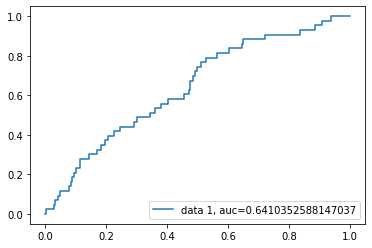

In [ ]:
# Plotting the Receiver Operator Curve (ROC)
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

In [ ]:
# initializing a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

In [ ]:
# fitting the model to the training data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# obtaining predictions
y_pred_nb = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (y_test != y_pred_nb).sum()))

Number of mislabeled points out of a total 787 points : 62


In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred_nb, return_counts=True)

(array([0, 1]), array([762,  25]))

Model Evaluation

In [ ]:
# computing the balanced accuracy score for the predictions
balanced_accuracy_score(y_test, y_pred_nb)

0.5200987746936734

In [ ]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred_nb)

0.9212198221092758

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

conf_matrix

array([[722,  22],
       [ 40,   3]])

Exporting the predicitions for a submission

Export predictions into csv file  
• Format: id, prediction  
• Predictions must be 0 or 1 (not 0.5, not ‘Yes’, not ‘FALSE’)  
• Must contain all instances of the original test dataset

In [116]:
test.columns

Index(['Physician_ID', 'State', 'Primary_Specialty', 'total_payments',
       'number_of_payments'],
      dtype='object')

In [118]:
final_preds = xgbc_opt.predict(test[["total_payments", "number_of_payments"]])

In [119]:
# storing the ids and the corresponding predictions as a combined dataframe

submission = pd.DataFrame()

submission["id"] = test["Physician_ID"]

submission["prediction"] = final_preds


submission



,id,prediction
0,14,0
1,18,0
2,42,0
3,46,0
4,47,0
...,...,...
995,5953,1
996,5959,0
997,5964,0
998,5972,1


In [120]:
# storing the submission data in a csv file
submission.to_csv('submission_2_team_sgs.csv', index=False) 

In [121]:
from google.colab import files
files.download("submission_2_team_sgs.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>